## 01. Import Libraries

In [3]:
# import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import seaborn as sns

## 02. Import data

In [6]:
# import data

df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts.csv', index_col = 0)

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_4555/1110657379.py:3: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts.csv', index_col = 0)


In [8]:
# quick check

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count
0,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000,5105
1,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583,5105
2,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850,5105
3,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733,5105
4,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150,5105


In [10]:
# going to check data types (and make sure date is in date time format!)

df.dtypes

ride_id                 object
rideable_type           object
started_at              object
ended_at                object
start_station_name      object
start_station_id        object
end_station_name        object
end_station_id          object
start_lat              float64
start_lng              float64
end_lat                float64
end_lng                float64
member_casual           object
date                    object
average_temp           float64
trip_length_minutes    float64
daily_ride_count         int64
dtype: object

In [12]:
# making date column into date time!

df['date'] = pd.to_datetime(df['date'])
df.dtypes

ride_id                        object
rideable_type                  object
started_at                     object
ended_at                       object
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
date                   datetime64[ns]
average_temp                  float64
trip_length_minutes           float64
daily_ride_count                int64
dtype: object

In [14]:
# things look good! onto the next step!

## 03. Data Visualizations

In [16]:
# before we start our visualizations, let's set a theme for our charts so they are  ~cohesive~
# after taking a closer look at cityBike branding, I am going to opt for a palette that contains blues, as it is more personalized to the client 
# (citibike also has red in their logo)

# also want to consider accessibility, so considering a palette that will be user friendly to those experiencing color blindness

# sns.color_palette(palette='PuBu')
# sns.color_palette(palette='RdBu') -> will likely use this one!

sns.set_palette(palette='RdBu')

In [18]:
# let's start by seeing how many users are in each category (members vs casual users)

df['member_casual'].value_counts()

member_casual
member    5803846
casual    1637662
Name: count, dtype: int64

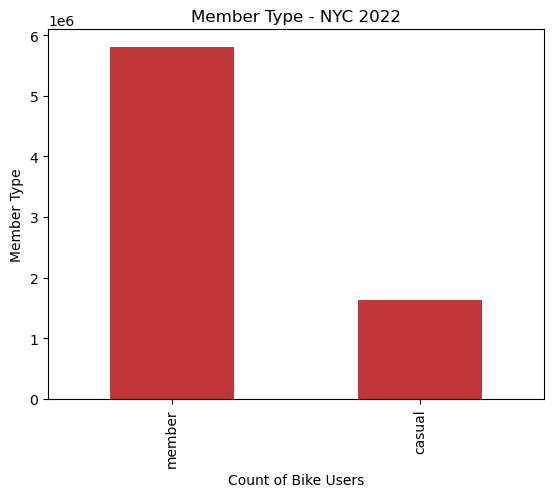

In [20]:
# while this gives us good info, we can also view this as a bar chart (which can be interpreted more quickly)

df['member_casual'].value_counts().plot(kind = 'bar')

# now let's add labels

plt.xlabel('Count of Bike Users')
plt.ylabel('Member Type')
plt.title('Member Type - NYC 2022')

plt.show()

In [22]:
# this is much better! now let's investigate the data for other insights
# it could be helpful to know which stations are the most popular!
# lets create a new dataframe with just our top 20 starting stations (going to use the grouping method)

# first we are creating a  new column in our dataframe, and setting the value to 1
# this indicates that the first instance of each station will having a starting count of 1
# as we go through the dataframe, this will increase

df['value'] = 1
df_top20start = df.groupby('start_station_name')['value'].count().reset_index()

# now we can take the top 20, and create another dataframe with JUST these stations:

top20start = df_top20start.nlargest(20, 'value')
top20start

,start_station_name,value
1587,W 21 St & 6 Ave,32322
1718,West St & Chambers St,30728
495,Broadway & W 58 St,28794
286,6 Ave & W 33 St,26504
8,1 Ave & E 68 St,26103
485,Broadway & W 25 St,24676
461,Broadway & E 14 St,24503
1511,University Pl & E 14 St,24192
463,Broadway & E 21 St,23671
1603,W 31 St & 7 Ave,23465


In [24]:
# looks good! going to repeat this for the top 20 ending stations as well!
# recycling code from above with a few modifications!

df['value_end'] = 1
df_top20end = df.groupby('end_station_name')['value_end'].count().reset_index()
top20end = df_top20end.nlargest(20, 'value_end')
top20end

,end_station_name,value_end
1637,W 21 St & 6 Ave,32406
1770,West St & Chambers St,31057
508,Broadway & W 58 St,27501
289,6 Ave & W 33 St,26346
8,1 Ave & E 68 St,26158
498,Broadway & W 25 St,24864
1560,University Pl & E 14 St,24832
474,Broadway & E 14 St,24398
476,Broadway & E 21 St,23920
1653,W 31 St & 7 Ave,23453


In [26]:
# interestingly enough, it lools like there is some overlap!
# this can give valuable info into rider activity!
# now let's chart these!

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_4555/3638175835.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20start, x = 'value', y = 'start_station_name', palette=("RdBu"))


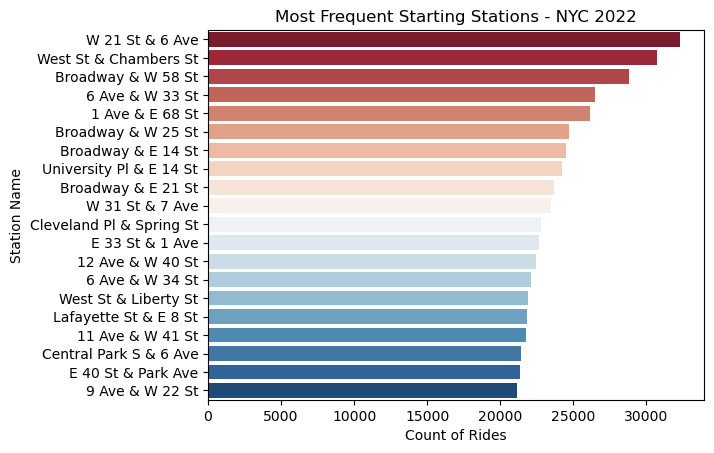

In [28]:
# going to use seaborn and the above palette!
# sns.color_palette(palette='RdBu')

sns.barplot(data = top20start, x = 'value', y = 'start_station_name', palette=("RdBu"))

# let's add some labels!
plt.title("Most Frequent Starting Stations - NYC 2022")
plt.ylabel("Station Name")
plt.xlabel("Count of Rides")
plt.show()

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_4555/2281407248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top20end, x = 'value_end', y = 'end_station_name', palette=("RdBu"))


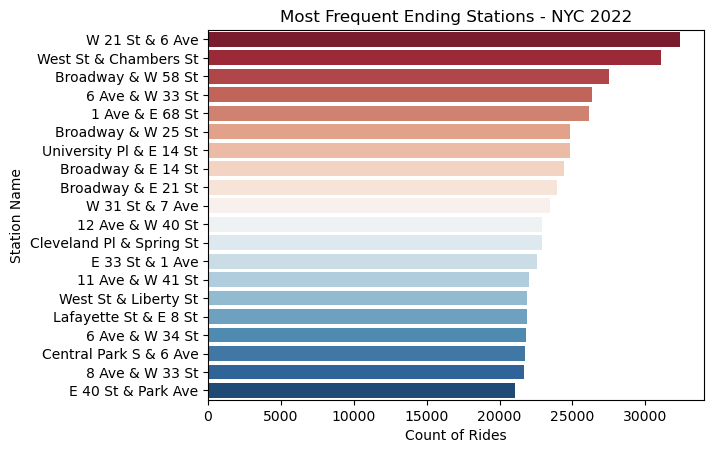

In [30]:
# looks good! let's repeat for our end stations :)
# recycling our above code, with some modifications

sns.barplot(data = top20end, x = 'value_end', y = 'end_station_name', palette=("RdBu"))

# let's add some labels!
plt.title("Most Frequent Ending Stations - NYC 2022")
plt.ylabel("Station Name")
plt.xlabel("Count of Rides")
plt.show()

In [32]:
# these look good! going to recreate the dual axis plot from the last notebook using seaborn!

# this was a line plot with daily average temperature and ride count per day
# we made sure that the date column was in date-time format already
# the next step is to make a new dataframe with the date as our axis!

df_temp = df.set_index('date')
df_temp

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,average_temp,trip_length_minutes,daily_ride_count,value,value_end
date,,,,,,,,,,,,,,,,,,
2022-01-01,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,11.6,10.368000,5105,1,1
2022-01-01,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,11.6,8.487583,5105,1,1
2022-01-01,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,11.6,22.788850,5105,1,1
2022-01-01,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,11.6,10.781733,5105,1,1
2022-01-01,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,11.6,9.753150,5105,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,B0C57EA724B535EE,classic_bike,2022-12-31 11:03:00.039,2022-12-31 11:23:47.697,Dock St & Front St,4903.09,Union St & 4 Ave,4175.15,40.702709,-73.992530,40.677274,-73.982820,member,8.2,20.794300,7858,1,1
2022-12-31,BB5230400FC38074,electric_bike,2022-12-31 20:09:46.125,2022-12-31 20:27:15.408,W 87 St & West End Ave,7484.05,W 63 St & Broadway,7052.01,40.789515,-73.978084,40.771639,-73.982614,member,8.2,17.488050,7858,1,1
2022-12-31,F87F8C5F57F46EEB,electric_bike,2022-12-31 11:25:03.854,2022-12-31 11:46:29.055,E 81 St & 3 Ave,7154.07,Broadway & W 25 St,6173.08,40.775907,-73.956488,40.742869,-73.989186,member,8.2,21.420017,7858,1,1


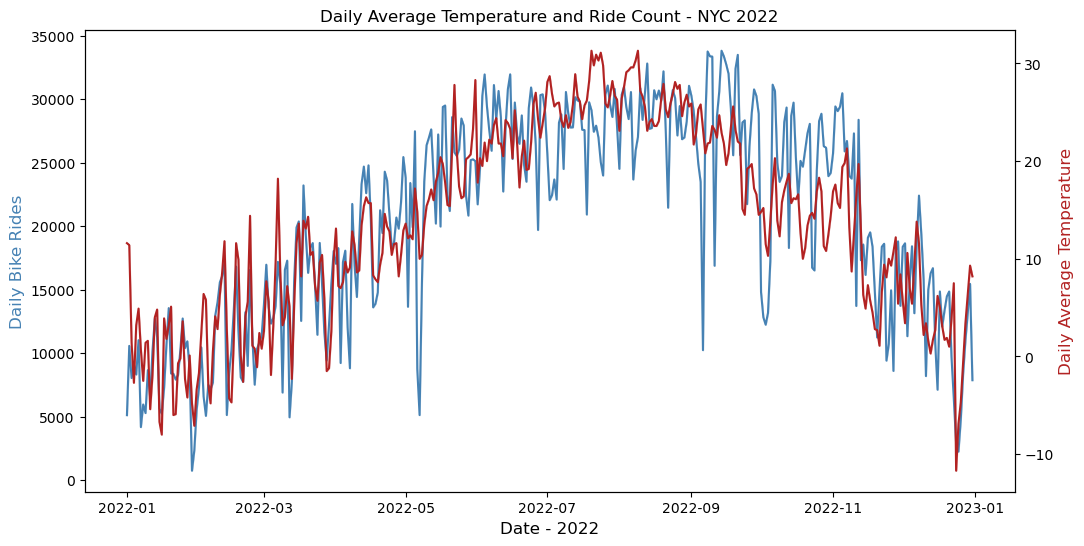

In [34]:
# perfect, now we will be using df_temp to create our line graph!

fig,ax = plt.subplots(figsize = (12,6))

# plotting rides
sns.lineplot(data = df_temp['daily_ride_count'], color = 'steelblue')
ax.set_xlabel("Date - 2022", fontsize = 12)
ax.set_ylabel("Daily Bike Rides", fontsize = 12, color = 'steelblue')

# plotting temp
ax2 = ax.twinx()
sns.lineplot(data = df_temp['average_temp'], color = 'firebrick')
ax2.set_ylabel("Daily Average Temperature", fontsize = 12, color = 'firebrick')

plt.title("Daily Average Temperature and Ride Count - NYC 2022")
plt.show()

In [36]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,trip_length_minutes,daily_ride_count,value,value_end
0,3369D016821ACD0A,classic_bike,2022-01-01 09:55:25.013,2022-01-01 10:05:47.093,Lafayette St & E 8 St,5788.13,8 Ave & W 16 St,6072.11,40.730207,-73.991026,40.740983,-74.001702,casual,2022-01-01,11.6,10.368000,5105,1,1
1,0617BD2A38E149CF,electric_bike,2022-01-01 15:10:00.630,2022-01-01 15:18:29.885,Frederick Douglass Blvd & W 117 St,7688.12,Park Ave & E 124 St,7682.01,40.805159,-73.954692,40.804555,-73.939686,casual,2022-01-01,11.6,8.487583,5105,1,1
2,040D9CEB9A11C469,electric_bike,2022-01-01 02:35:34.345,2022-01-01 02:58:21.676,W 42 St & 6 Ave,6517.08,W 100 St & Broadway,7580.01,40.754920,-73.984550,40.797372,-73.970412,member,2022-01-01,11.6,22.788850,5105,1,1
3,7E01F3FA7BAC8F02,classic_bike,2022-01-01 15:29:24.789,2022-01-01 15:40:11.693,1 Ave & E 16 St,5779.08,Hudson St & W 13 St,6115.06,40.732219,-73.981656,40.740057,-74.005274,member,2022-01-01,11.6,10.781733,5105,1,1
4,5FBAD09F5F32B2E4,electric_bike,2022-01-01 08:38:24.623,2022-01-01 08:48:09.812,W 59 St & 10 Ave,7023.04,West End Ave & W 94 St,7524.09,40.770513,-73.988038,40.794165,-73.974124,member,2022-01-01,11.6,9.753150,5105,1,1


In [38]:
# make a box plot of one of the categorical variables:
# i think it would be useful to check out the trip length and how it relates to other variables!


/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_4555/955329957.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df, palette = "RdBu")


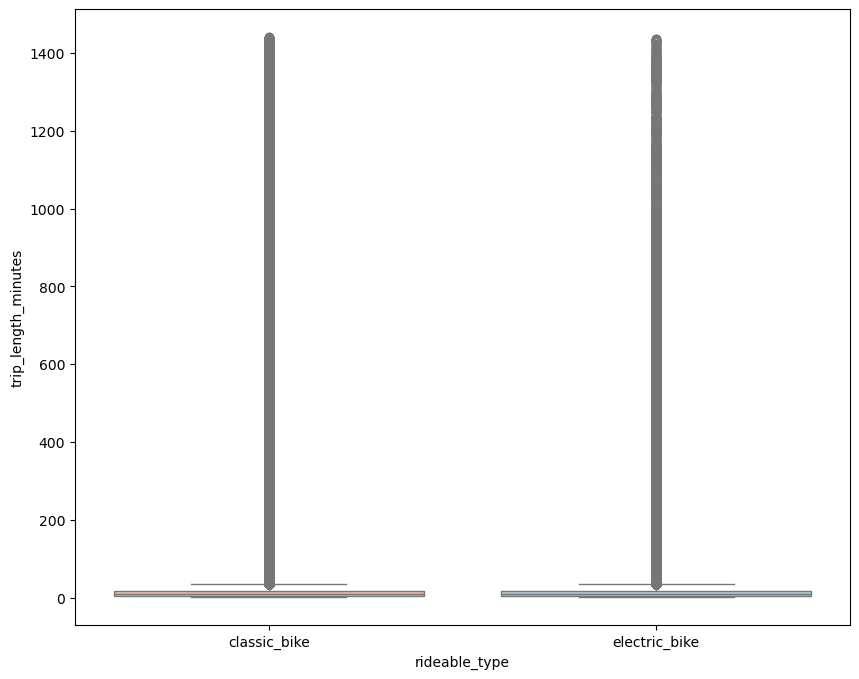

In [42]:
# it might be interesting to see if ride length differs by bike type!
# our three bike types are electric_bike, docked_bike and classic_bike
# will also use trip_length_minutes column

plt.figure(figsize=(10,8))
sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df, palette = "RdBu")
plt.show()

In [44]:
# this didn't show up as expected, lets check data types and make modifications if needed:

df.dtypes

ride_id                        object
rideable_type                  object
started_at                     object
ended_at                       object
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
date                   datetime64[ns]
average_temp                  float64
trip_length_minutes           float64
daily_ride_count                int64
value                           int64
value_end                       int64
dtype: object

In [46]:
# probably need to make rideable_type and member_casual into category types:

df['member_casual'] = df['member_casual'].astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')
df.dtypes

ride_id                        object
rideable_type                category
started_at                     object
ended_at                       object
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
date                   datetime64[ns]
average_temp                  float64
trip_length_minutes           float64
daily_ride_count                int64
value                           int64
value_end                       int64
dtype: object

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_4555/2382106013.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df, palette = "RdBu", showfliers=False)


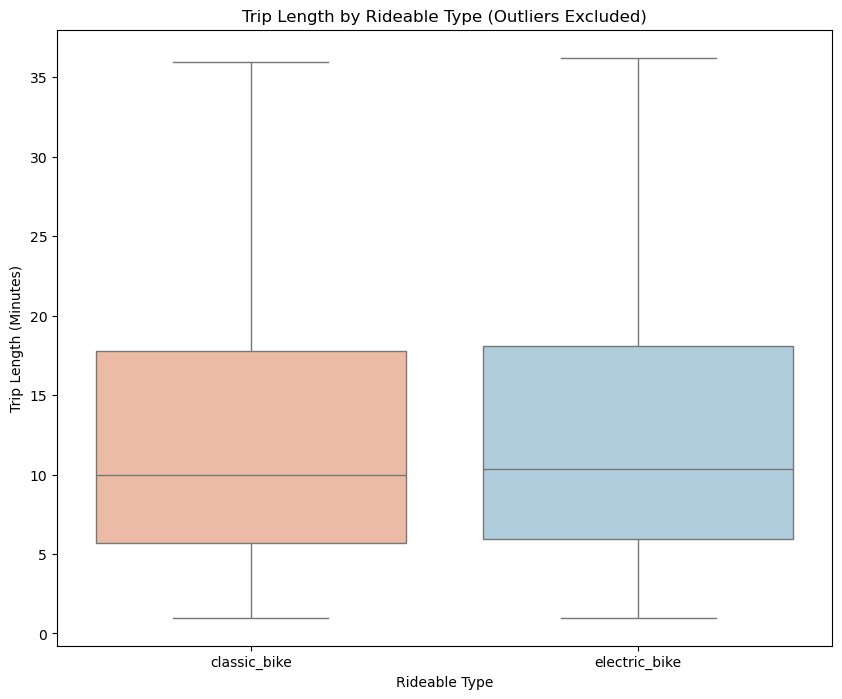

In [48]:
# cool, let's try the above plot again (then repeat with member type), and exclude our outliers

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'rideable_type', y = 'trip_length_minutes', data = df, palette = "RdBu", showfliers=False)
plt.title('Trip Length by Rideable Type (Outliers Excluded)')
plt.xlabel('Rideable Type')
plt.ylabel('Trip Length (Minutes)')
plt.show()

It appears that both bike types have similar ride lengths, but the average for electric_bikes is slightly higher.

In [51]:
df['rideable_type'].value_counts()

rideable_type
classic_bike     4517924
electric_bike    2923584
Name: count, dtype: int64

/var/folders/02/_ydtglj578xfqwjs1hm49rhc0000gn/T/ipykernel_4555/1653391156.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'member_casual', y = 'trip_length_minutes', data = df, palette = "RdBu", showfliers = False)


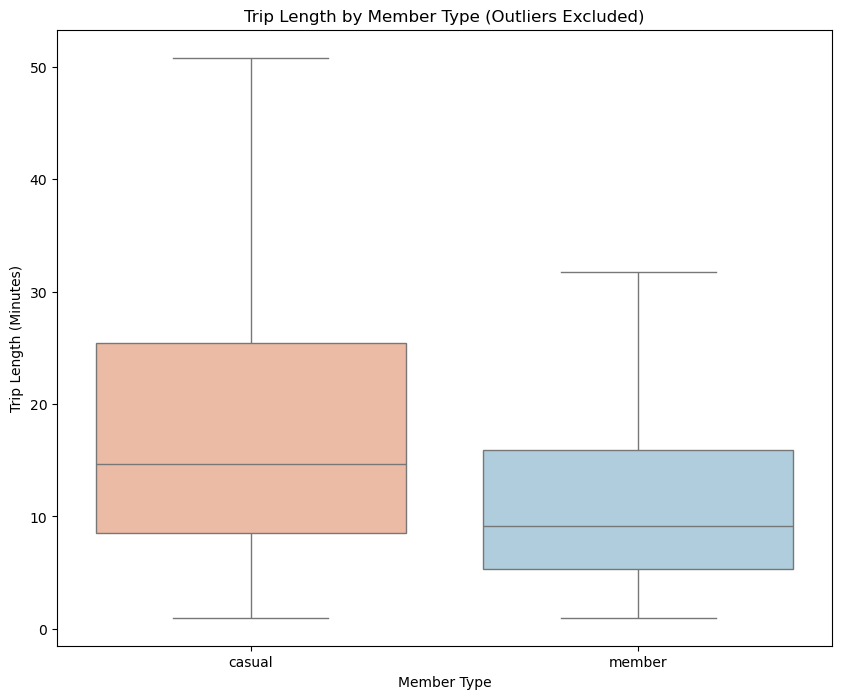

In [55]:
# now, let's do this for member type

plt.figure(figsize=(10, 8))
sns.boxplot(x = 'member_casual', y = 'trip_length_minutes', data = df, palette = "RdBu", showfliers = False)
plt.title('Trip Length by Member Type (Outliers Excluded)')
plt.xlabel('Member Type')
plt.ylabel('Trip Length (Minutes)')
plt.show()

The above shows that casual users have an average trip length that is longer than members, and a wider range of trip lengths as well. This could be explained by the fact that NYC sees a lot of tourist activity, with riders that are not as likely to have a citibike membership (due to unavailability in their home area). Tourists might be more likely to "adventure" and bike around a city, while members might use the bikes as their primary mode of transportation to/from, keeping rides shorter and more purposeful.

In [67]:
df['member_casual'].value_counts()

member_casual
member    5803846
casual    1637662
Name: count, dtype: int64

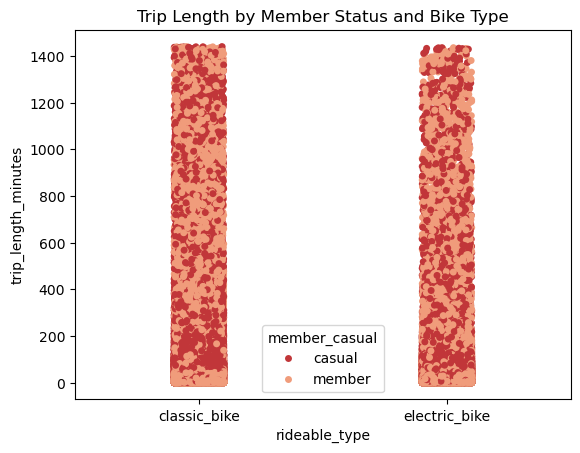

In [58]:
# let's do a quick strip plot with the above variables!

sns.stripplot(x = 'rideable_type', y = 'trip_length_minutes', data = df, hue = 'member_casual')

plt.title('Trip Length by Member Status and Bike Type')
plt.show()

It looks like we have a pretty even split between casual and member riders, but when we calculated the above counts for both casual riders and members, we were able to observe that there are a larger number of member riders! In this case, it might be help to compare aggregated measures for both groups of rider type.

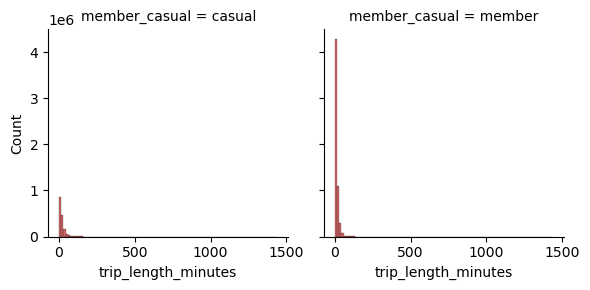

In [64]:
# time to build a facetGrid! We're going to stick with the member type variable for this 

grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "trip_length_minutes", bins = 100)

Despite adjusting the bins several times, this is not very legible. I will need to figure out how to adjust the axis on these or use another unit of measurement... It can be seen that there are more member riders and the majority of all riders keep their rides pretty short!